In [3]:
from graphmodels.graphmodel_exp import GraphModel, concatenate_graph_specs
from graphmodels.validation import check_model, check_variable_graph

In [4]:
# TEE_CO2eq_nodes = {'EF_EEi': {'type': 'input',
#                               'unit': 'kg CH4 / head',
#                               'name': 'Emission factor enteric (CH4)'},
#                    'TAi': {'type': 'variable',
#                            'unit': 'heads',
#                            'name': 'Total animal population'},
#                    'GWPCH4': {'type': 'parameter',
#                               'unit': 'CH4/CO2',
#                               'name': 'GWP conversion CO2eq'},
#                    'TEE_CO2eq': {'type': 'output',
#                                  'unit': 'gigagrams (CO2eq)',
#                                  'name': 'CH4 emissions enteric in CO2eq',
#                                  'computation': lambda TAi, EF_EEi, GWPCH4, **kwargs: (TAi * EF_EEi).sum() * GWPCH4
#                                  }
#                   }


# GraphModel(TEE_CO2eq_nodes).draw()

In [5]:
# FE_CO2eq_nodes = {'CL_total': {'type': 'input',
#                                'name': 'Cropland (including perm. and fallow land)',
#                                'unit': '1000 ha'},
#                   'SFU': {'type': 'input', 'unit': 'kg/ha', 'name': 'Surfacic fertilizer use'},
#                   'IN_F': {'type': 'variable',
#                            'unit': 'kgN',
#                            'name': 'Fertilizer input',
#                            'computation': lambda CL_total, SFU, **kwargs: CL_total * FU
#                            },
#                   'EF_F': {'type': 'parameter',
#                            'unit': 'kg N2O-N/kg N',
#                            'name': 'Emission factor N2O from fertilizer'},
#                   'F_N2O': {'type': 'variable',
#                             'unit': 'gigagrams (N2O)',
#                             'name': 'N2O emissions from fertilizer use',
#                             'computation': lambda IN_F, EF_F, **kwargs: IN_F * EF_F
#                             },
#                   'GWPN2O': {'type': 'parameter',
#                              'unit': 'N2O/CO2',
#                              'name': 'GWP conversion CO2eq'},
#                   'FE_CO2eq': {'type': 'output',
#                                'unit': 'gigagrams (CO2eq)',
#                                'name': 'Emissions fertilizer CO2eq',
#                                'computation': lambda F_N2O, GWPN2O, **kwargs: F_N2O * GWPN2O}
#                  }


# GraphModel(FE_CO2eq_nodes).draw()

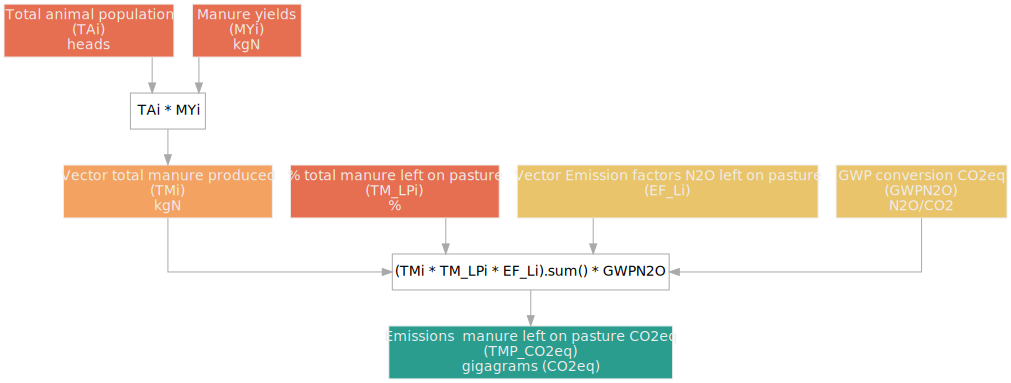

In [6]:
TMP_CO2eq_nodes = {'TAi': {'type': 'input', 'unit': 'heads', 'name': 'Total animal population'},
                   'MYi': {'type': 'input', 'unit': 'kgN', 'name': 'Manure yields'},
                   'TMi': {'type': 'variable',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced',
                           'computation': lambda TAi, MYi, **kwargs: TAi * MYi
                           },
                   'TM_LPi': {'type': 'input',
                              'unit': '%',
                              'name': '% total manure left on pasture'},
                   'EF_Li': {'type': 'parameter',
                             'unit': '',
                             'name': 'Vector Emission factors N2O left on pasture'
                             },
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMP_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure left on pasture CO2eq',
                                 'computation': lambda TMi, TM_LPi, EF_Li, GWPN2O, **kwargs: (TMi * TM_LPi * EF_Li).sum() * GWPN2O}}

GraphModel(TMP_CO2eq_nodes).draw()

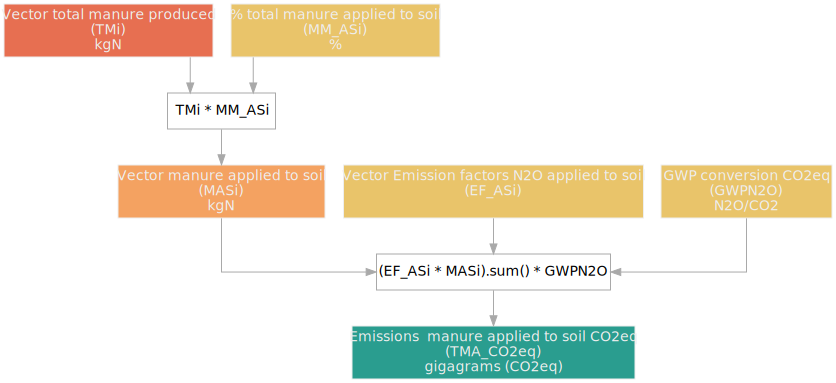

In [7]:
TMA_CO2eq_nodes = {'TMi': {'type': 'input',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced'},
                   'MM_ASi': {'type': 'parameter',
                              'unit': '%',
                              'name': '% total manure applied to soil'},
                   'MASi': {'type': 'variable',
                            'unit': 'kgN',
                            'name': 'Vector manure applied to soil',
                            'computation': lambda TMi, MM_ASi, **kwargs: TMi * MM_ASi
                            },
                   'EF_ASi': {'type': 'parameter',
                              'unit': '',
                              'name': 'Vector Emission factors N2O applied to soil'},
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMA_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure applied to soil CO2eq',
                                 'computation': lambda EF_ASi, MASi, GWPN2O, **kwargs: (EF_ASi * MASi).sum() * GWPN2O
                                 }
                   }

GraphModel(TMA_CO2eq_nodes).draw()

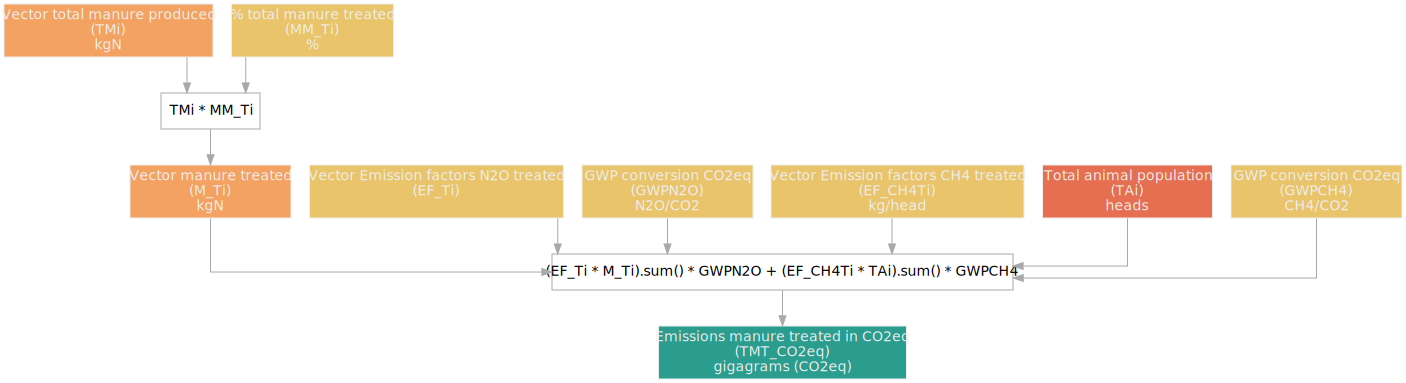

In [8]:
TMT_CO2eq_nodes = {'TMi': {'type': 'variable',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced'},
                   'MM_Ti': {'type': 'parameter', 'unit': '%', 'name': '% total manure treated'},
                   'M_Ti': {'type': 'variable',
                            'unit': 'kgN',
                            'name': 'Vector manure treated',
                            'computation': lambda TMi, MM_Ti, **kwargs: TMi * MM_Ti
                            },
                   'EF_Ti': {'type': 'parameter',
                             'unit': '',
                             'name': 'Vector Emission factors N2O treated'},
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'EF_CH4Ti': {'type': 'parameter',
                                'unit': 'kg/head',
                                'name': 'Vector Emission factors CH4 treated'},
                   'TAi': {'type': 'input',
                           'unit': 'heads',
                           'name': 'Total animal population'},
                   'GWPCH4': {'type': 'parameter',
                              'unit': 'CH4/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMT_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions manure treated in CO2eq',
                                 'computation': lambda EF_Ti, M_Ti, GWPN2O, EF_CH4Ti, TAi, GWPCH4, **kwargs: (EF_Ti * M_Ti).sum() * GWPN2O + (EF_CH4Ti * TAi).sum() * GWPCH4}}


GraphModel(TMT_CO2eq_nodes).draw()

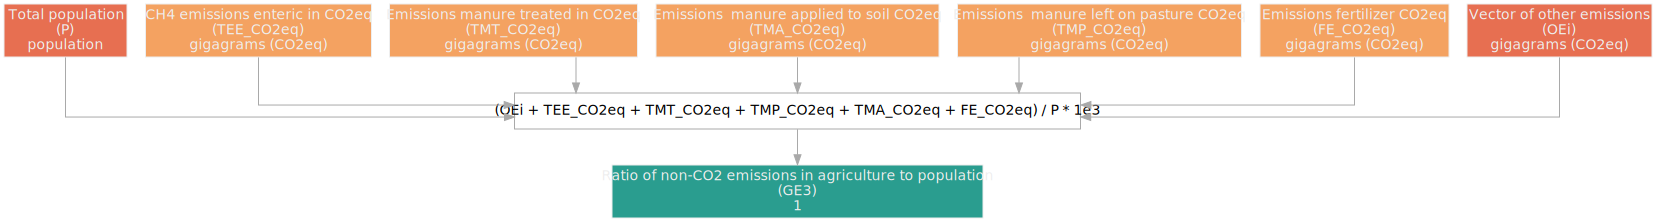

In [9]:
GE3_nodes = {'P': {'type': 'input', 'unit': 'population', 'name': 'Total population'},
             'TEE_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'CH4 emissions enteric in CO2eq'},
             'TMT_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions manure treated in CO2eq'},
             'TMA_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions  manure applied to soil CO2eq'},
             'TMP_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions  manure left on pasture CO2eq'},
             'FE_CO2eq': {'type': 'variable',
                          'unit': 'gigagrams (CO2eq)',
                          'name': 'Emissions fertilizer CO2eq'},
             'OEi': {'type': 'input',
                     'unit': 'gigagrams (CO2eq)',
                     'name': 'Vector of other emissions'},
             'GE3': {'type': 'output',
                     'unit': '1',
                     'name': 'Ratio of non-CO2 emissions in agriculture to population',
                     'computation': lambda OEi, TEE_CO2eq, TMT_CO2eq, TMP_CO2eq, TMA_CO2eq, FE_CO2eq, P, **kwargs: (OEi + TEE_CO2eq + TMT_CO2eq + TMP_CO2eq + TMA_CO2eq + FE_CO2eq) / P * 1e3}}


GraphModel(GE3_nodes).draw()

In [10]:
all_nodes = [TEE_CO2eq_nodes, FE_CO2eq_nodes, TMP_CO2eq_nodes, TMA_CO2eq_nodes, TMT_CO2eq_nodes, GE3_nodes]
model_GE3 = GraphModel(concatenate_graph_specs(all_nodes))

NameError: name 'TEE_CO2eq_nodes' is not defined

In [ ]:
model_GE3.draw()

In [ ]:
model_GE3.summary_df

# Animal

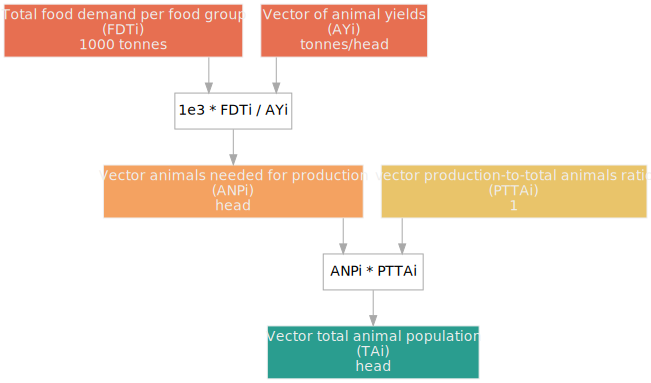

In [20]:
TAi_nodes = {'FDTi': {'type': 'input',
                      'unit': '1000 tonnes',
                      'name': 'Total food demand per food group'},
             'AYi': {'type': 'input',
                     'unit': 'tonnes/head',
                     'name': 'Vector of animal yields'},
             'ANPi': {'type': 'variable',
                      'unit': 'head',
                      'name': 'Vector animals needed for production',
                      'computation': lambda FDTi, AYi, **kwargs: 1e3 * FDTi / AYi
                      },
             'PTTAi': {'type': 'parameter',
                       'unit': '1',
                       'name': 'vector production-to-total animals ratio',
                       },
             'TAi': {'type': 'output',
                      'unit': 'head',
                      'name': 'Vector total animal population',
                      'computation': lambda ANPi, PTTAi, **kwargs: ANPi * PTTAi
                      },
             }

TAi_model = GraphModel(TAi_nodes)

TAi_model.draw()

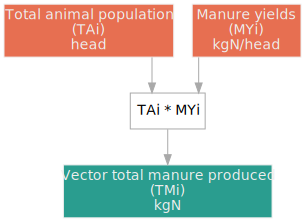

In [21]:
TMi_nodes = {'TAi': {'type': 'input', 'unit': 'head', 'name': 'Total animal population'},
             'MYi': {'type': 'input', 'unit': 'kgN/head', 'name': 'Manure yields'},
             'TMi': {'type': 'output',
                     'unit': 'kgN',
                     'name': 'Vector total manure produced',
                     'computation': lambda TAi, MYi, **kwargs: TAi * MYi
                    }
            }

TMi_model = GraphModel(TMi_nodes)

TMi_model.draw()

# add data

In [16]:
model_GE3.summary_df

,name,type,unit,computation
id,,,,
EF_EEi,Emission factor enteric (CH4),input,kg CH4 / head,NaN
TAi,Total animal population,variable,heads,NaN
GWPCH4,GWP conversion CO2eq,parameter,CH4/CO2,NaN
TEE_CO2eq,CH4 emissions enteric in CO2eq,variable,gigagrams (CO2eq),(TAi * EF_EEi).sum() * GWPCH4
CL_total,Cropland (including perm. and fallow land),input,1000 ha,NaN
SFU,Surfacic fertilizer use,input,kg/ha,NaN
IN_F,Fertilizer input,variable,kgN,CL_total * FU
EF_F,Emission factor N2O from fertilizer,parameter,kg N2O-N/kg N,NaN
F_N2O,N2O emissions from fertilizer use,variable,gigagrams (N2O),IN_F * EF_F


# Validation

In [17]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import r2_score

def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X


def pivot(df):
    return df.pivot(index=['Area', 'Year','Item'], columns='GGI_code', values='Value')


def plot_variable(computation, baseline):
    df = pd.concat([computation, baseline],axis=1).dropna()
    df.columns = ['computation','baseline']
    fig = px.scatter(df.reset_index(), x=f'baseline', y=f'computation', hover_data=['Area', 'Year'])
    return fig


def check_model(Model, df):
    '''Run a model without scenario to check that the aggregation is correct
    
    TO CLEAN UP
    
    '''
    pivoted = pivot(df)
    
    inputs_parameters = Model.inputs_() + Model.parameters_()
    
    output = Model.outputs_()[0]
    
    X = df_to_dict(pivoted[inputs_parameters])

    computation = Model.run(X)[output]
    
    baseline = pivoted[output]
    
    return r2_baseline_computation(baseline, computation)

def r2_baseline_computation(baseline, computation):
    base_comp = pd.concat([baseline, computation], axis=1).dropna()
    base_comp.columns=['baseline', 'computation']
    return r2_score(base_comp.baseline, base_comp.computation)

In [18]:
# Global variables
to_drop = ['Mules and Asses', 'Sheep and Goats', 'Cattle',
           'Swine', 'Poultry Birds', 'All Animals',
           'Camels and Llamas', 'Chickens']

GWPN2O = 310
GWPCH4 = 21
N2ON_to_NO2 = 1.57
kg_to_Gg = 1e-6

In [19]:
df = pd.read_csv('models/Hermen/data/GY_GE_GU_GM_GP.csv')

# TMP

In [21]:
TMP_CO2eq_nodes = {'M_LPi': {'type': 'input',
                              'unit': 'kg',
                              'name': 'Manure left on pasture (N content)'},
                   'EF_Li': {'type': 'parameter',
                             'unit': 'kg N2O-N/kg N',
                             'name': 'Implied emission factor for N2O (Manure on pasture)'
                             },
                   'TMP_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions (CO2eq) (Manure on pasture)',
                                 'computation': lambda M_LPi, EF_Li, **kwargs: kg_to_Gg * N2ON_to_NO2 * GWPN2O * (M_LPi * EF_Li)
                                }}

Model = GraphModel(TMP_CO2eq_nodes)

check_model(Model, df)

0.9999968180596825

# TMT

In [22]:
TMT_CO2eq_nodes = {'M_Ti': {'type': 'input',
                            'unit': 'kgN',
                            'name': 'Manure treated (N content)',
                            },
                   'EF_Ti': {'type': 'parameter',
                             'unit': 'kg N2O-N/kg N',
                             'name': 'Implied emission factor for N2O (Manure management)'},
                   'EF_CH4Ti': {'type': 'parameter',
                                'unit': 'kg/head',
                                'name': 'Implied emission factor for CH4 (Manure management)'},
                   'TAi': {'type': 'input',
                           'unit': 'head',
                           'name': 'Total animal population'},
                   'E_Ti': {'type': 'variable',
                                 'unit': 'gigagrams',
                                 'name': 'Emissions (N2O) (Manure management)',
                                 'computation': lambda EF_Ti, M_Ti, **kwargs: (EF_Ti * M_Ti) * N2ON_to_NO2 * kg_to_Gg
                                },
                   'E_TCH4i': {'type': 'variable',
                                 'unit': 'gigagrams',
                                 'name': 'Emissions (CH4) (Manure management)',
                                 'computation': lambda EF_CH4Ti, TAi, **kwargs: (EF_CH4Ti * TAi) * kg_to_Gg
                                },
                   'TMT_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions (CO2eq) (Manure management)',
                                 'computation': lambda E_Ti, E_TCH4i, **kwargs: (E_Ti * GWPN2O + E_TCH4i * GWPCH4)
                                }}



Model = GraphModel(TMT_CO2eq_nodes)

check_model(Model, df)

0.9999974341321574

# TMA

In [28]:
TMA_CO2eq_nodes = {'M_ASi': {'type': 'input',
                            'unit': 'kgN',
                            'name': 'Manure applied to soils (N content)',
                            },
                   'EF_ASi': {'type': 'parameter',
                              'unit': 'kg N2O-N/kg N',
                              'name': 'Implied emission factor for N2O (Manure applied)'},
                   'TMA_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions (CO2eq) (Manure applied)',
                                 'computation': lambda EF_ASi, M_ASi, **kwargs:  GWPN2O * N2ON_to_NO2 * kg_to_Gg * (EF_ASi * M_ASi) 
                                 }
                   }

Model = GraphModel(TMA_CO2eq_nodes)


check_model(Model, df)

0.9999929071340482

# TEE

In [29]:
TEE_CO2eq_nodes = {'EF_EEi': {'type': 'input',
                              'unit': 'kg CH4 / head',
                              'name': 'Implied emission factor for CH4 (Enteric)'},
                   'TAi': {'type': 'input',
                           'unit': 'head',
                           'name': 'Total animal population'},
                   'TEE_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions (CO2eq) (Enteric)',
                                 'computation': lambda TAi, EF_EEi, **kwargs: kg_to_Gg * GWPCH4 * (TAi * EF_EEi)
                                 }
                  }


Model = GraphModel(TEE_CO2eq_nodes)


check_model(Model, df)

1.0

# FE

In [30]:
FE_CO2eq_nodes = {
                  'IN_F': {'type': 'input',
                           'unit': 'kg',
                           'name': 'Agricultural Use in nutrients',
                           },
                  'EF_F': {'type': 'parameter',
                           'unit': 'kg N2O-N/kg N',
                           'name': 'Implied emission factor for N2O (Synthetic fertilizers)'},
                  'FE_CO2eq': {'type': 'output',
                               'unit': 'gigagrams (CO2eq)',
                               'name': 'Emissions (CO2eq) (Synthetic fertilizers)',
                               'computation': lambda EF_F, IN_F, **kwargs: GWPN2O * N2ON_to_NO2 * kg_to_Gg *(EF_F * IN_F)
                              }
                 }


Model = GraphModel(FE_CO2eq_nodes)

check_model(Model, df)

0.9999872362988971

# TOTAL GRAPH

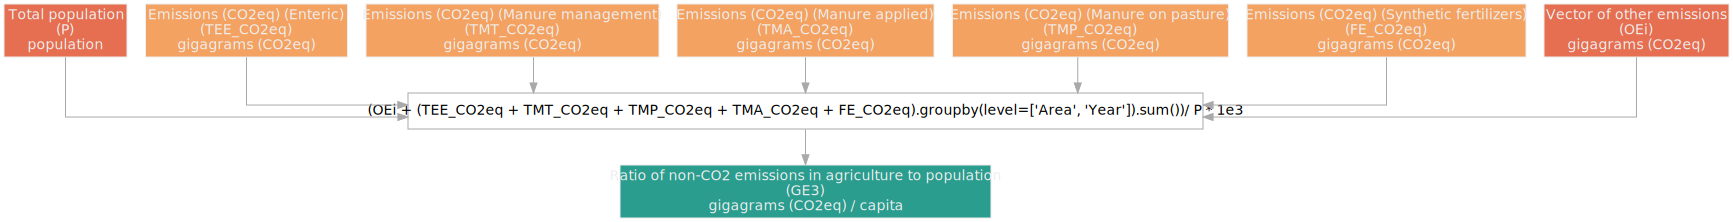

In [31]:
GE3_nodes = {'P': {'type': 'input', 'unit': 'population', 'name': 'Total population'},
             'TEE_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions (CO2eq) (Enteric)'},
             'TMT_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions (CO2eq) (Manure management)'},
             'TMA_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions (CO2eq) (Manure applied)'},
             'TMP_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions (CO2eq) (Manure on pasture)'},
             'FE_CO2eq': {'type': 'variable',
                          'unit': 'gigagrams (CO2eq)',
                          'name': 'Emissions (CO2eq) (Synthetic fertilizers)'},
             'OEi': {'type': 'input',
                     'unit': 'gigagrams (CO2eq)',
                     'name': 'Vector of other emissions'},
             'GE3': {'type': 'output',
                     'unit': 'gigagrams (CO2eq) / capita',
                     'name': 'Ratio of non-CO2 emissions in agriculture to population',
                     'computation': lambda OEi, TEE_CO2eq, TMT_CO2eq, TMP_CO2eq, TMA_CO2eq, FE_CO2eq, P, **kwargs: (OEi + (TEE_CO2eq + TMT_CO2eq + TMP_CO2eq + TMA_CO2eq + FE_CO2eq).groupby(level=['Area', 'Year']).sum())/ P * 1e3}}


GraphModel(GE3_nodes).draw()

In [32]:
nodes = concatenate_graph_specs([GE3_nodes, TEE_CO2eq_nodes, TMA_CO2eq_nodes, TMT_CO2eq_nodes, TMP_CO2eq_nodes, FE_CO2eq_nodes])

Model = GraphModel(nodes)#.draw()

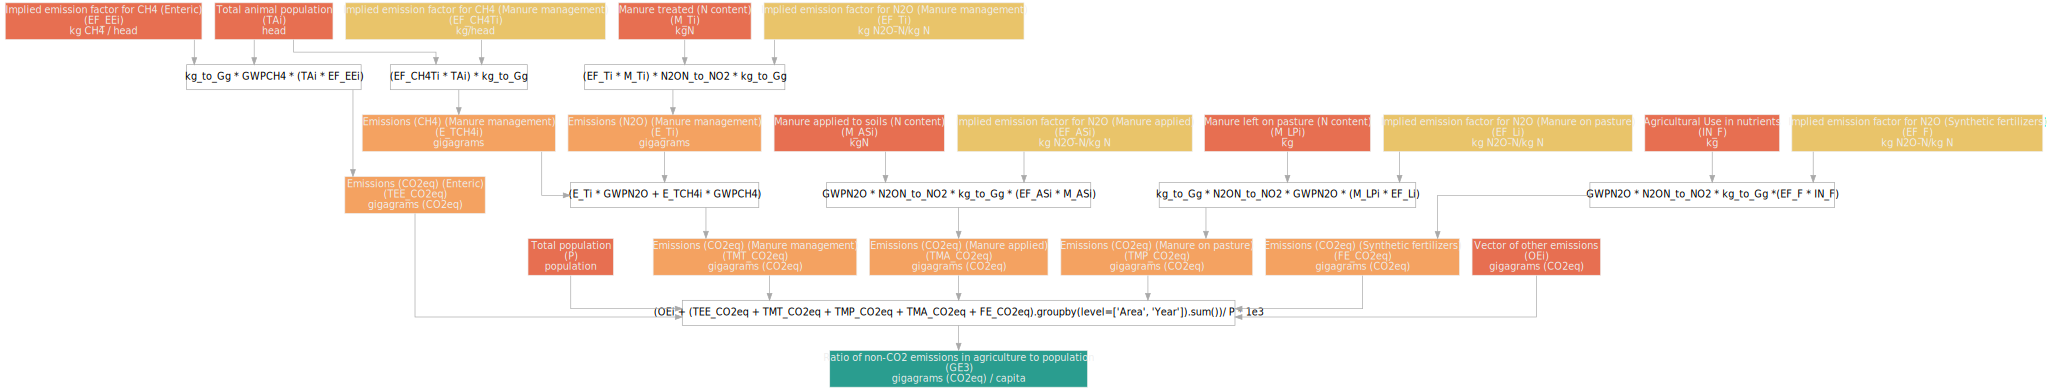

In [33]:
Model.draw()

In [38]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import r2_score

def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X


def pivot(df):
    return df.pivot(index=['Area', 'Year','Item'], columns='GGI_code', values='Value')


def check_model(Model, df):
    '''Run a model without scenario to check that the aggregation is correct
    
    TO CLEAN UP
    
    '''
    pivoted = pivot(df)

    X = df_to_dict(pivoted[Model.inputs_() + Model.parameters_()])
    
    results = Model.run(X)
    
    print('Checking outputs:')
    for output in Model.outputs_():
        computation = results[output]
        baseline = pivoted[output]
        print(output, "r2:", r2_baseline_computation(baseline, computation))
    
    print('Checking variables:')
    for variable in Model.variables_():
        computation = results[variable]
        baseline = pivoted[variable]
        print(variable, "r2:", r2_baseline_computation(baseline, computation))
        

def r2_baseline_computation(baseline, computation):
    base_comp = pd.concat([baseline, computation], axis=1).dropna()
    base_comp.columns=['baseline', 'computation']
    return r2_score(base_comp.baseline, base_comp.computation)

In [39]:
check_model(Model, df)

Checking outputs:
TEE_CO2eq r2: 1.0
TMA_CO2eq r2: 0.9999929071340482
TMT_CO2eq r2: 0.9999974341321574
TMP_CO2eq r2: 0.9999968180596825
FE_CO2eq r2: 0.9999872362988971
Checking variables:
E_Ti r2: 0.9999918521942965
E_TCH4i r2: 0.9999999999812567
